### Gibbs sampling MCMC:

Initialize X(0)

For $t=1,2,...,T$ :

   $\hspace{10pt}$ Set $x_1= X_1(t-1)$

   $\hspace{10pt}$ For $j = 1,...,d$:
 
   $\hspace{20pt}$ Generate $X^*_j(t) \sim f(X_j |x_{(-j)})$
      
   $\hspace{20pt}$ set $x_j = X^*_j(t)$

$\hspace{10pt}$ Set $X(t) = (X^*_1(t),..., X^*_d(t))$
      
      


We will test the algorithm by sampling from bivariate gaussian:
$$f_X(x_1,x_2) = \frac{1}{(2 \pi)}|\boldsymbol{\Sigma}|^{-1/2}\exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{T}\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right )$$

During Gibbs sampling, we will be sampling from $f(x_1|x_2)$ so we must derive bayes rule for guassians



$$f(\boldsymbol{x}_1, \boldsymbol{x_2}) = N(\boldsymbol{x}\mid \boldsymbol{\mu}, \boldsymbol{\Sigma})$$
$$\boldsymbol{\mu}=
\begin{pmatrix}
\boldsymbol{\mu}_1\\
\boldsymbol{\mu}_2
\end{pmatrix}, 
\boldsymbol{\Sigma} = 
\begin{pmatrix}
    \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
    \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}
\end{pmatrix}$$

\begin{align*}
    f(\boldsymbol{x}_1\mid \boldsymbol{x_2}) =& \frac{f(\boldsymbol{x}_2 \mid \boldsymbol{x_1})f(\boldsymbol{x_1})}{f(\boldsymbol{x_2})} \\\propto& f(\boldsymbol{x}_1, \boldsymbol{x_2})
     \\\\\propto&
    \exp\left\{-\frac{1}{2}\begin{pmatrix}
    \boldsymbol{x}_1 - \boldsymbol{\mu}_1\\
    \boldsymbol{x}_2 -\boldsymbol{\mu}_2
    \end{pmatrix}^T
    \begin{pmatrix}
        \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
        \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}
        \end{pmatrix}^{-1}\begin{pmatrix}
    \boldsymbol{x}_1 - \boldsymbol{\mu}_1\\
    \boldsymbol{x}_2 -\boldsymbol{\mu}_2
    \end{pmatrix}
    \right\}
\end{align*}

Using Schur-compliment, we have:
\begin{align*}
    \begin{pmatrix}
    \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
    \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}
\end{pmatrix}^{-1}, \mathbf{M} / \mathbf{H} = \boldsymbol{\Sigma}_{11} - \boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1} \boldsymbol{\Sigma}_{21}
\end{align*}

\begin{align*}
    (\mathbf{M} / \mathbf{H})^{-1} = (\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1}
\end{align*}

\begin{align*}
    \begin{pmatrix}
        \boldsymbol{\Sigma}_{11} & \boldsymbol{\Sigma}_{12}\\
        \boldsymbol{\Sigma}_{21} & \boldsymbol{\Sigma}_{22}
    \end{pmatrix}^{-1} =& 
    \begin{pmatrix}
        (\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1} & -(\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1}\boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1}\\
        -\boldsymbol{\Sigma}_{22}^{-1}\boldsymbol{\Sigma}_{21}(\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1} & \boldsymbol{\Sigma}_{22}^{-1} + \boldsymbol{\Sigma}_{22}^{-1}\boldsymbol{\Sigma}_{21}(\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1}\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1} 
    \end{pmatrix} \\=&
    \begin{pmatrix}
        \mathbf{I} & \mathbf{0}\\
        \boldsymbol{\Sigma}_{22}^{-1}\boldsymbol{\Sigma}_{21}& \mathbf{I}
    \end{pmatrix}
    \begin{pmatrix}
        (\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1}&\mathbf{0}\\ 
        \mathbf{0} & \boldsymbol{\Sigma}_{22}^{-1}
    \end{pmatrix}
    \begin{pmatrix}
        \mathbf{I} & -\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_{22})^{-1}\\
        \mathbf{0} & \mathbf{I}
    \end{pmatrix}
\end{align*}
Plugging in the compliment into the joint distribution yields:

\begin{align*}
    &\exp\left\{-\frac{1}{2}\begin{pmatrix}
    \boldsymbol{x}_1 - \boldsymbol{\mu}_1\\
    \boldsymbol{x}_2 -\boldsymbol{\mu}_2
    \end{pmatrix}^T
    \begin{pmatrix}
        \mathbf{I} & \mathbf{0}\\
        \boldsymbol{\Sigma}_{22}^{-1}\boldsymbol{\Sigma}_{21}& \mathbf{I}
    \end{pmatrix}
    \begin{pmatrix}
        (\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1}&\mathbf{0}\\ 
        \mathbf{0} & \boldsymbol{\Sigma}_{22}^{-1}
    \end{pmatrix}
    \begin{pmatrix}
        \mathbf{I} & -\boldsymbol{\Sigma}_{12}\boldsymbol{\Sigma}_{22})^{-1}\\
        \mathbf{0} & \mathbf{I}
    \end{pmatrix}
    \begin{pmatrix}
    \boldsymbol{x}_1 - \boldsymbol{\mu}_1\\
    \boldsymbol{x}_2 -\boldsymbol{\mu}_2
    \end{pmatrix}
    \right\}\\ =& \exp\left( -\frac{1}{2} (\boldsymbol{x}_1 - \boldsymbol{\mu}_1 - {\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1}( \boldsymbol{x}_2 -\boldsymbol{\mu}_2))^T(\boldsymbol{\Sigma} / \boldsymbol{\Sigma}_{22})^{-1} (\boldsymbol{x}_1 - \boldsymbol{\mu}_1 - {\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1} (\boldsymbol{x}_2 -\boldsymbol{\mu}_2)\right) \times \exp\left(-\frac{1}{2}(\boldsymbol{x}_2 -\boldsymbol{\mu}_2)\boldsymbol{\Sigma}_{22}^{-1}(\boldsymbol{x}_2 -\boldsymbol{\mu}_2) \right)\\
    =& f(\boldsymbol{x}_1 | \boldsymbol{x}_2)f(\boldsymbol{x}_2)
\end{align*}

Where $E[\boldsymbol{x}_1 | \boldsymbol{x}_2] = \boldsymbol{\mu}_1 + {\Sigma}_{12}\boldsymbol{\Sigma}_{22}^{-1}( \boldsymbol{x}_2 -\boldsymbol{\mu}_2)$

$Cov(\boldsymbol{x}_1 | \boldsymbol{x}_2) = \boldsymbol{\Sigma}_{11} - \boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1} \boldsymbol{\Sigma}_{21}$

So for the bivariate gaussian, we have:

$$\boldsymbol{\mu} = 
\begin{bmatrix}
    \mu_1\\
    \mu_2
\end{bmatrix}, \hspace{20pt}\boldsymbol{\Sigma}=\begin{bmatrix}
    \sigma_1^2 & \rho\sigma_1\sigma_2 \\
    \rho\sigma_2\sigma_1 & \sigma_2^2
    \end{bmatrix}
$$
So 
$E[\boldsymbol{x}_1 | \boldsymbol{x}_2] = \mu_1 + \rho\frac{\sigma_1}{\sigma_2}(x_2 - \mu_2) $

$Cov(\boldsymbol{x}_1 | \boldsymbol{x}_2) = \sigma_1^2(1-\rho^2)$

In [2]:
import numpy as np

def gibbs(mu1, mu2, sig1, sig2, rho, N):
    X = np.zeros((N,2))
    
    X[0,:] = [mu1, mu2]
    
    sd1 = sig1*np.sqrt((1 - rho**2))
    sd2 = sig2*np.sqrt((1 - rho**2))
    
    for t in range(1,N):
        x2 = X[t-1, 1]
        m1 = mu1 + rho*(sig1/sig2)*(x2 - mu2)
        X[t, 0] = np.random.normal(m1, sd1)
                                   
        x1 = X[t, 0]
        m2 = mu2 + rho*(sig2/sig1)*(x1 - mu1)
        
        X[t, 1] = np.random.normal(m2, sd2)
    
    return X

mu1 = 1.0
mu2 = 2.0
sig1 = 0.5
sig2 = 1.0
rho = 0.5
N=10000

result = gibbs(mu1, mu2, sig1, sig2, rho, N)[2000:]   
print(np.mean(result[:,0]), np.mean(result[:,1]))
print(np.cov(result))

1.0036120665197403 2.0138377327668997
[[0.50039411 0.36648118 0.25503533 ... 0.97258723 0.34955807 0.59871687]
 [0.36648118 0.26840536 0.18678407 ... 0.71230839 0.25601112 0.43849131]
 [0.25503533 0.18678407 0.12998358 ... 0.49569749 0.17815888 0.30514739]
 ...
 [0.97258723 0.71230839 0.49569749 ... 1.89036183 0.6794159  1.16369153]
 [0.34955807 0.25601112 0.17815888 ... 0.6794159  0.24418921 0.41824296]
 [0.59871687 0.43849131 0.30514739 ... 1.16369153 0.41824296 0.71635915]]


Text(0, 0.5, 'x2')

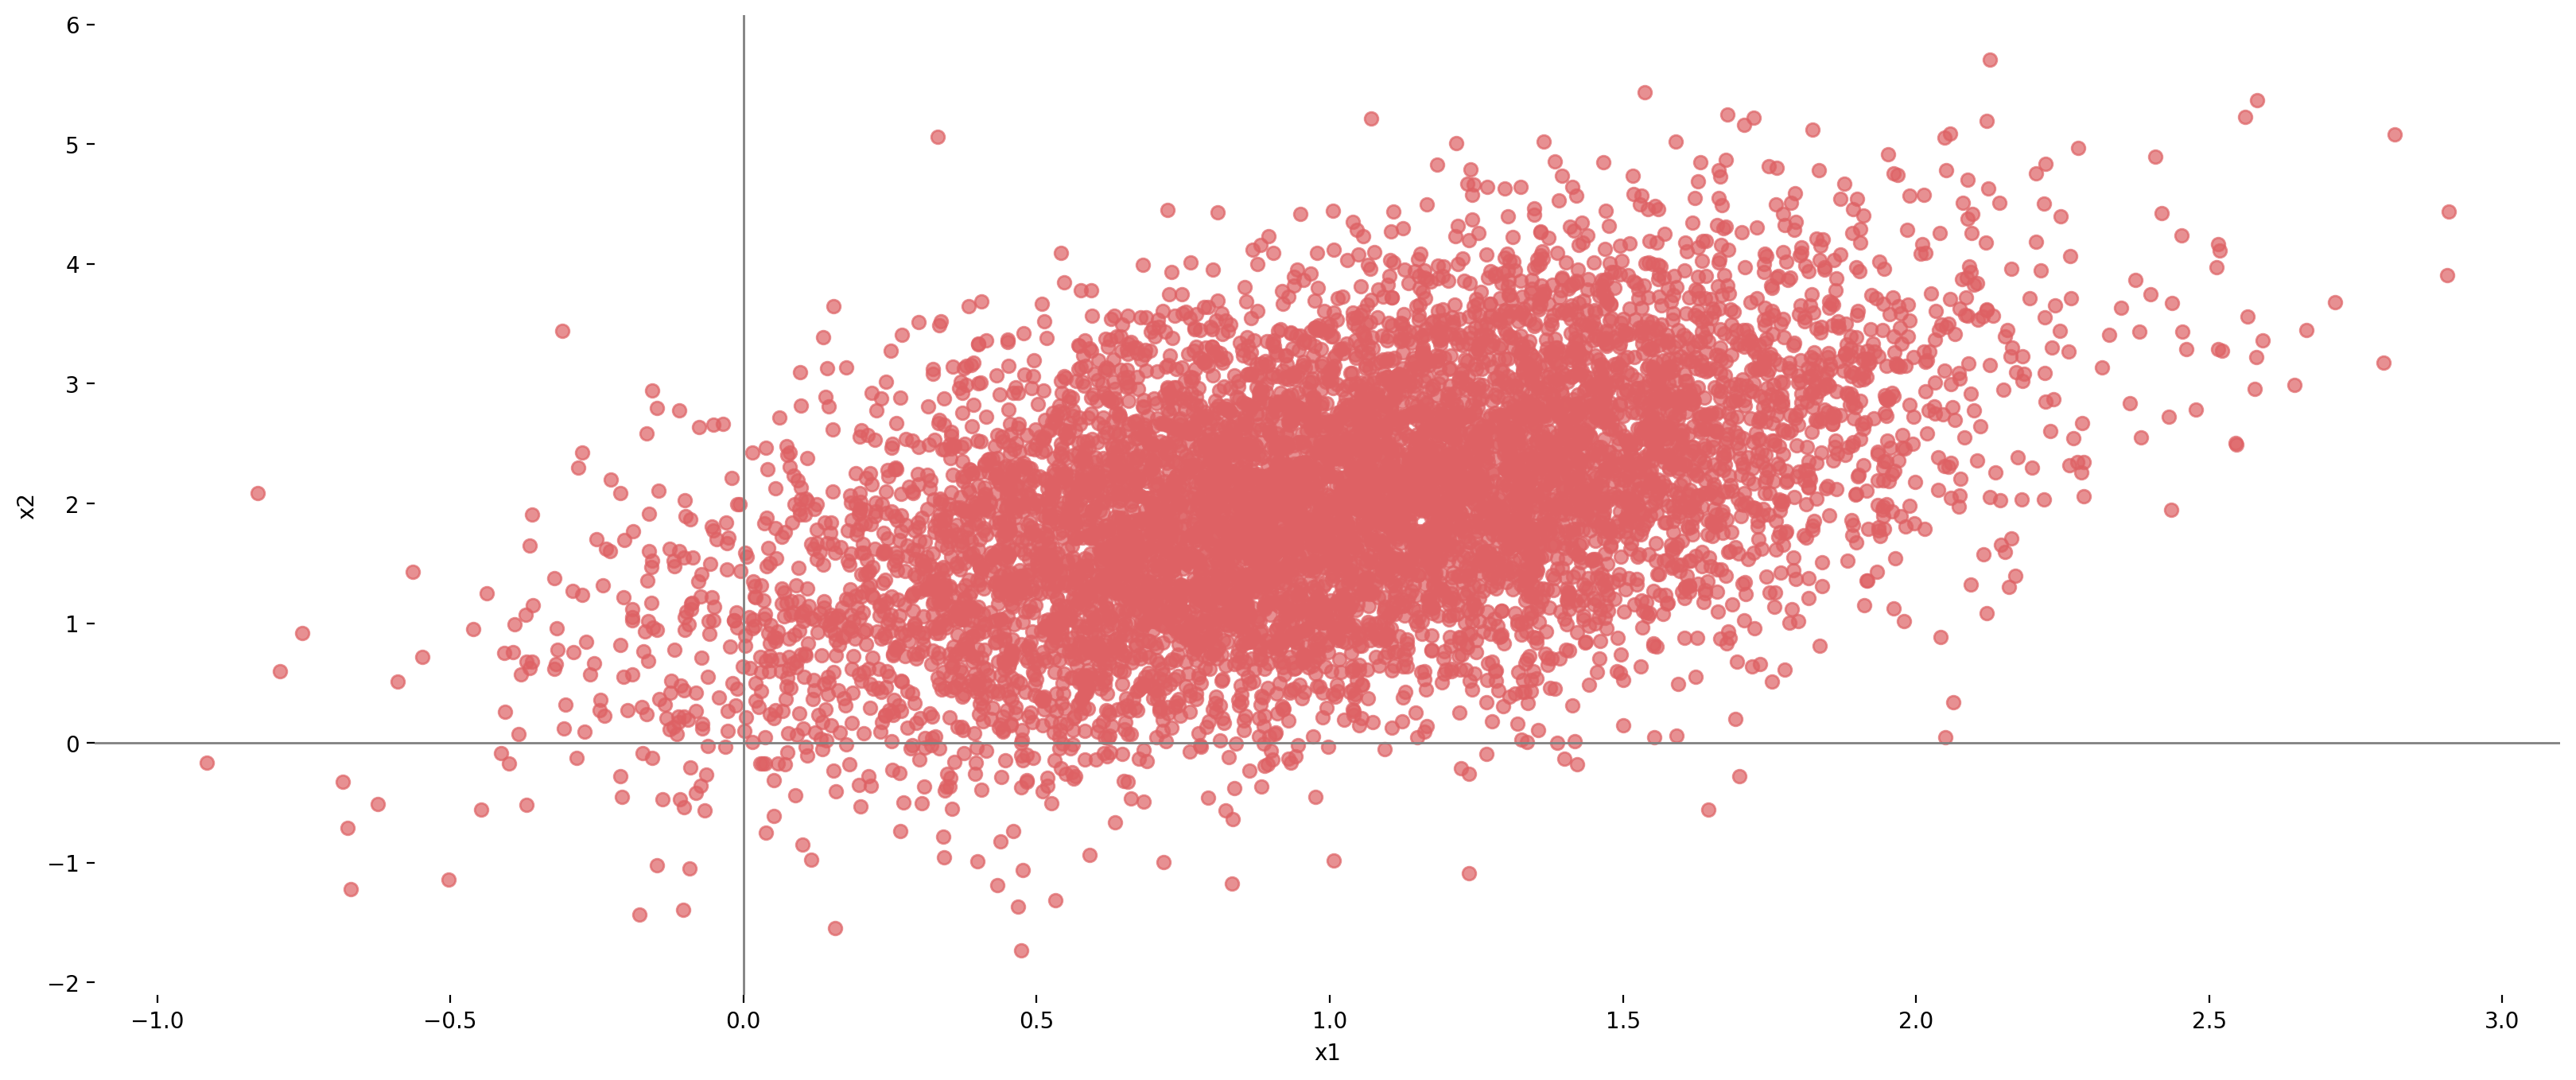

In [3]:
# do some plotting
import matplotlib.pyplot as plt

map = plt.get_cmap('plasma')

fig, ax = plt.subplots(dpi=200, figsize=(20,8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

x = result[:,0]
y = result[:,1]

ax.scatter(x, y, color = map.colors[150], alpha = 0.7)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [4]:
# add confidence ellipse 
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def multivariate_normal(X, mu, sigma):
    #X = X.reshape(2,-1)
    f = 1/(2*np.pi) * (np.linalg.det(sigma)**(-1/2)) * np.exp((-1/2)*(np.matmul(np.matmul(X-mu, np.linalg.inv(sigma)), np.transpose(X-mu))))
    return f

mu = [mu1, mu2]

# function from https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor, label = f"Estimated {n_std} standard deviation ellipse",
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

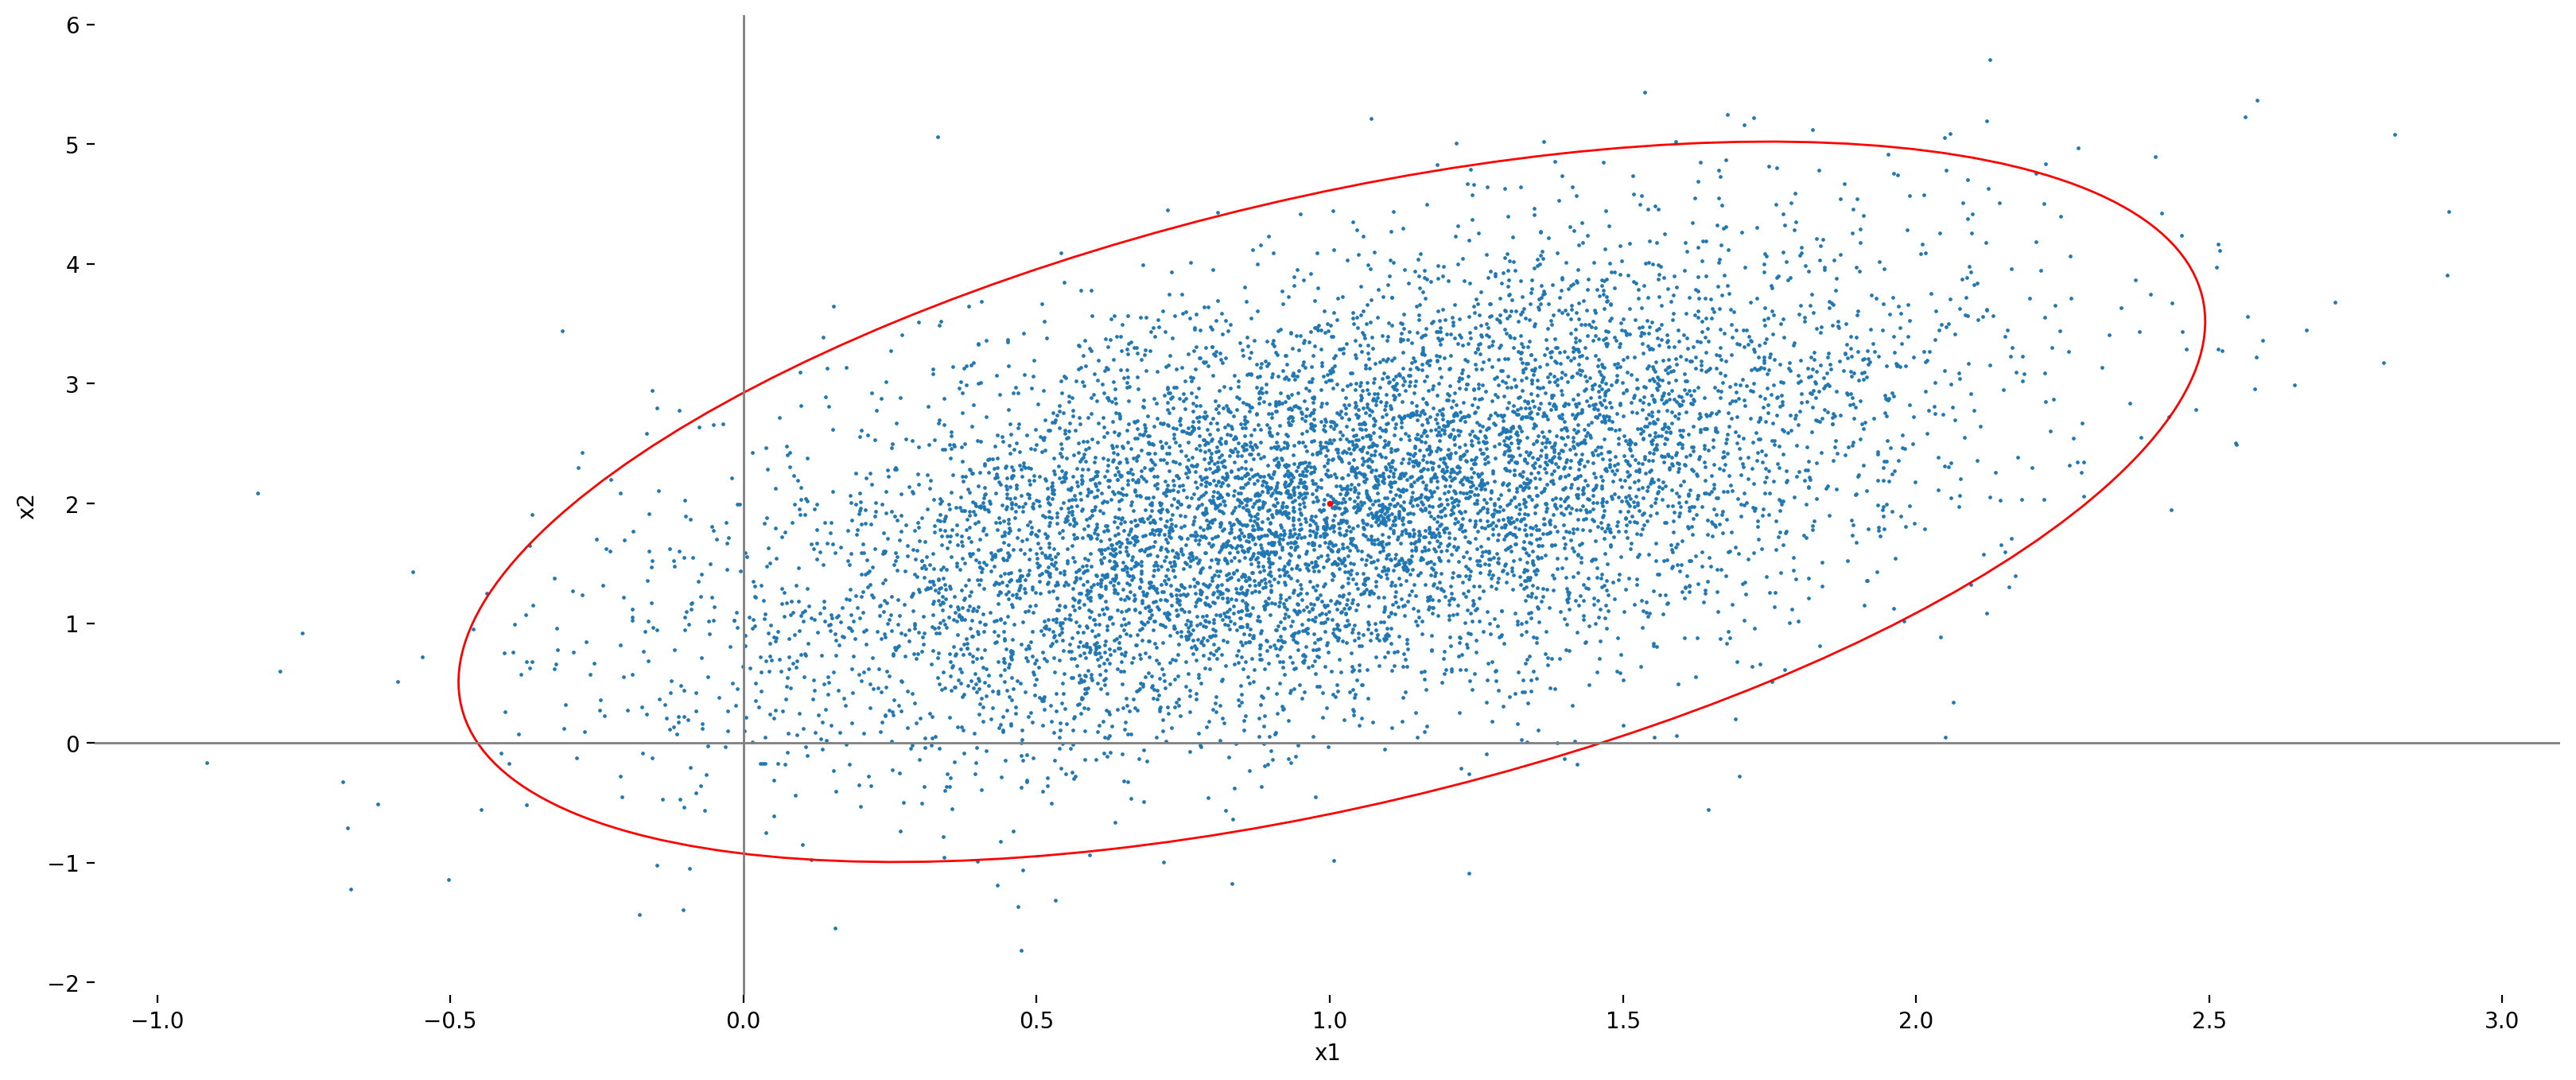

In [5]:
fig, ax = plt.subplots(dpi=200, figsize=(20,8))

ax.scatter(x, y, s=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, edgecolor='red')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.scatter(mu[0], mu[1], c='red', s=3)

In [6]:
# modified version
def confidence_ellipse_true(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + rho)
    ell_radius_y = np.sqrt(1 - rho)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor, label = "True",
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = sig1 * n_std
    mean_x = mu1

    # calculating the stdandard deviation of y ...
    scale_y = sig2 * n_std
    mean_y = mu2

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

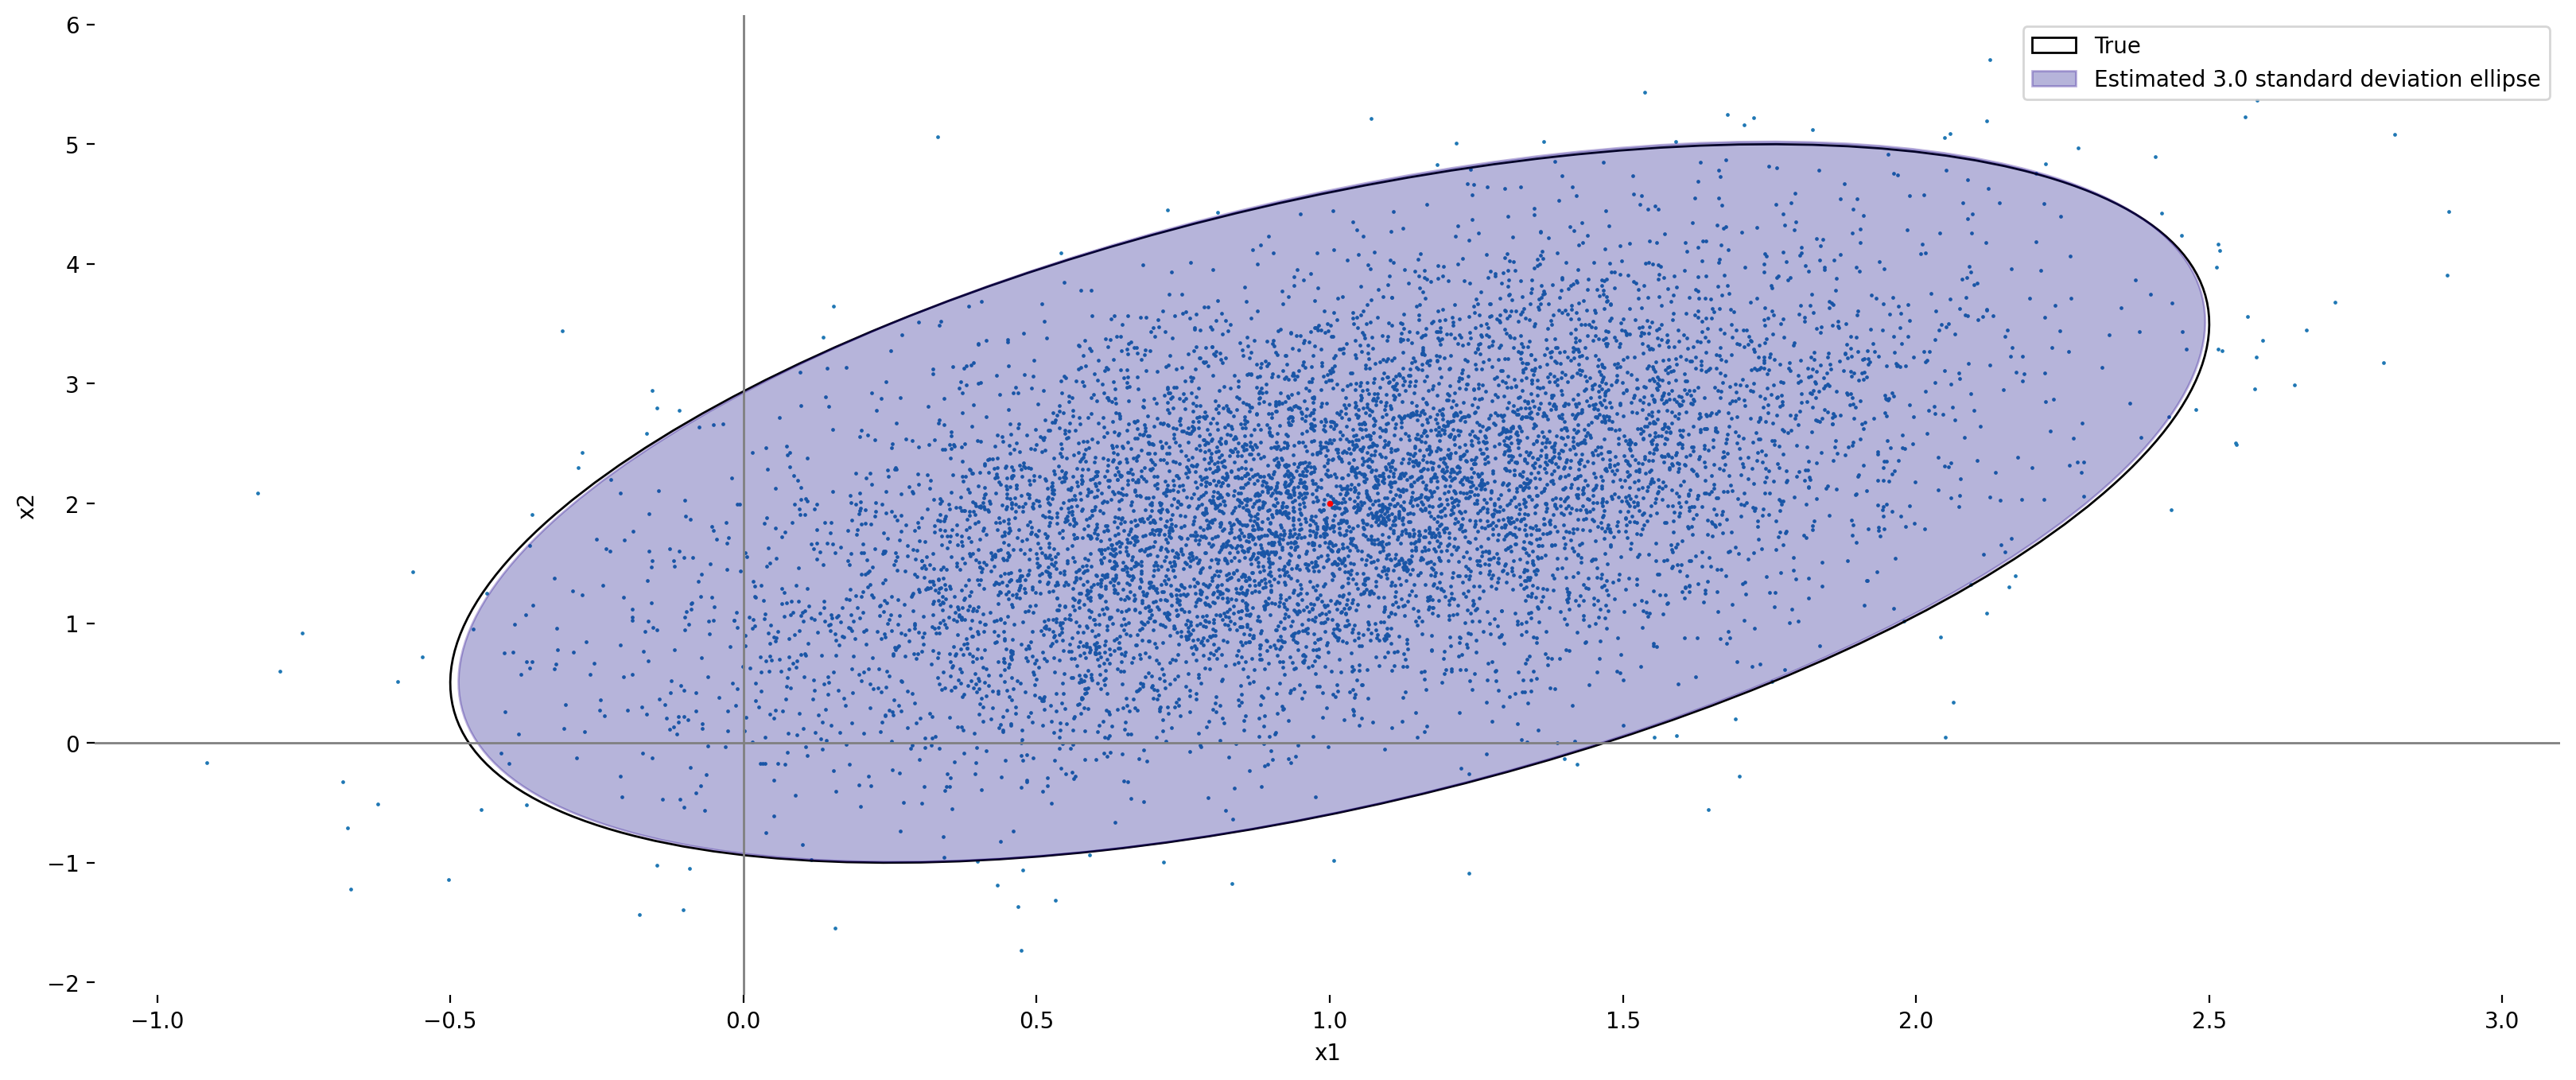

In [7]:
fig, ax = plt.subplots(dpi=200, figsize=(20,8))

ax.scatter(x, y, s=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse_true(x, y, ax, edgecolor='black')
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[0])

ax.scatter(mu[0], mu[1], c='red', s=3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

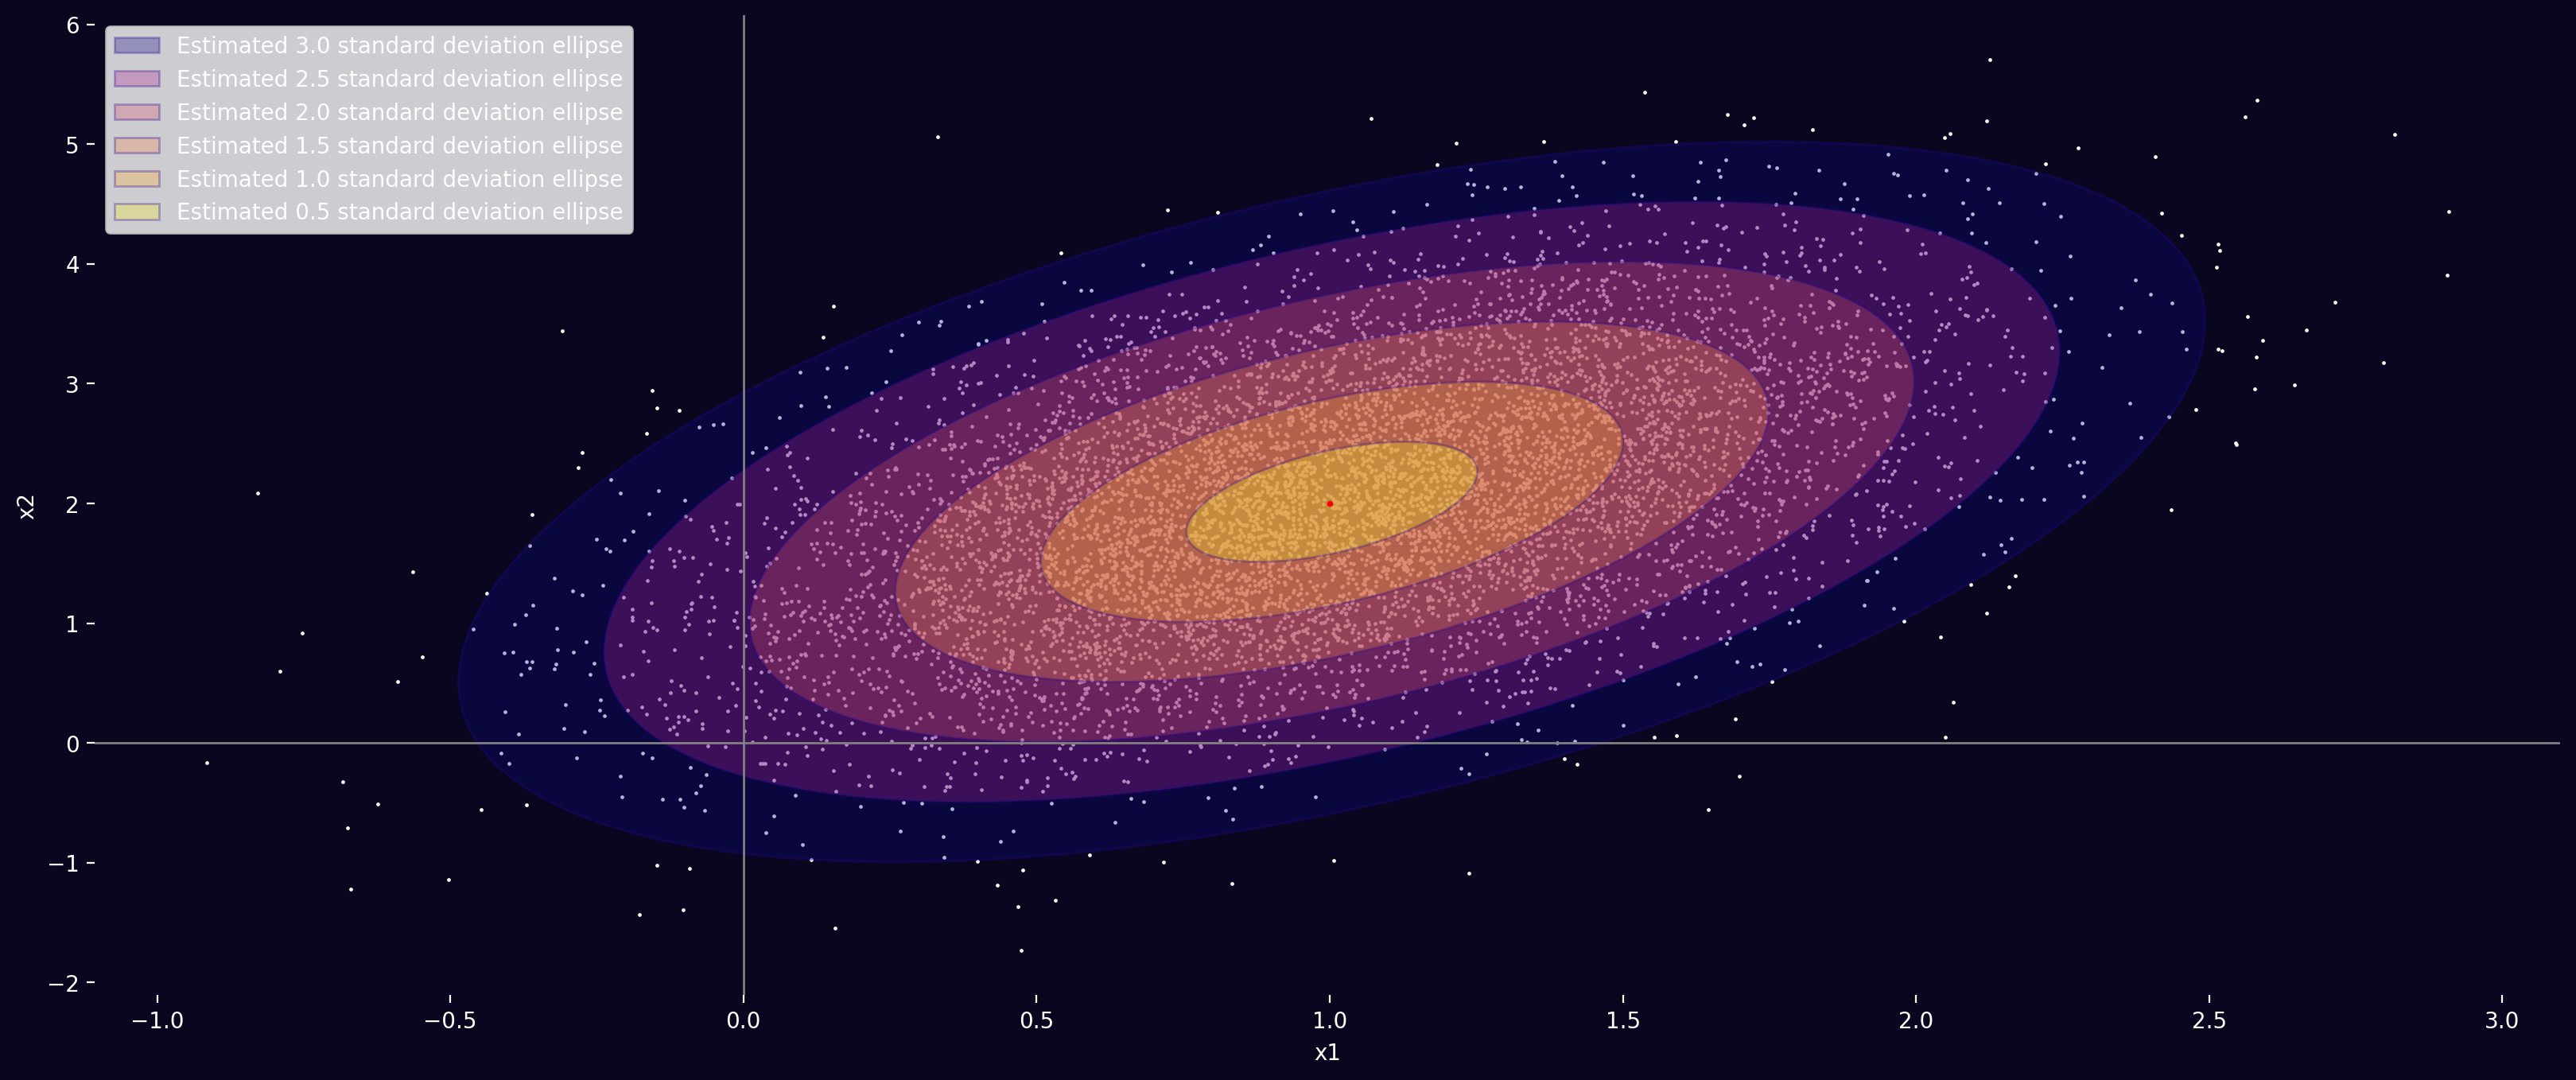

In [23]:
fig, ax = plt.subplots(dpi=200, figsize=(20,8))
magma = plt.get_cmap('magma')

ax.scatter(x, y, s=0.5, color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[0])
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[100], n_std=2.5)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[140], n_std=2.0)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[180], n_std=1.5)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[210], n_std=1.0)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=map.colors[250], n_std=0.5)

ax.scatter(mu[0], mu[1], c='red', s=3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_facecolor(magma.colors[15])
fig.patch.set_facecolor(magma.colors[15])

COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
ax.spines['bottom'].set_color(COLOR)
ax.spines['top'].set_color(COLOR)
ax.xaxis.label.set_color(COLOR)
ax.tick_params(axis='x', colors=COLOR)

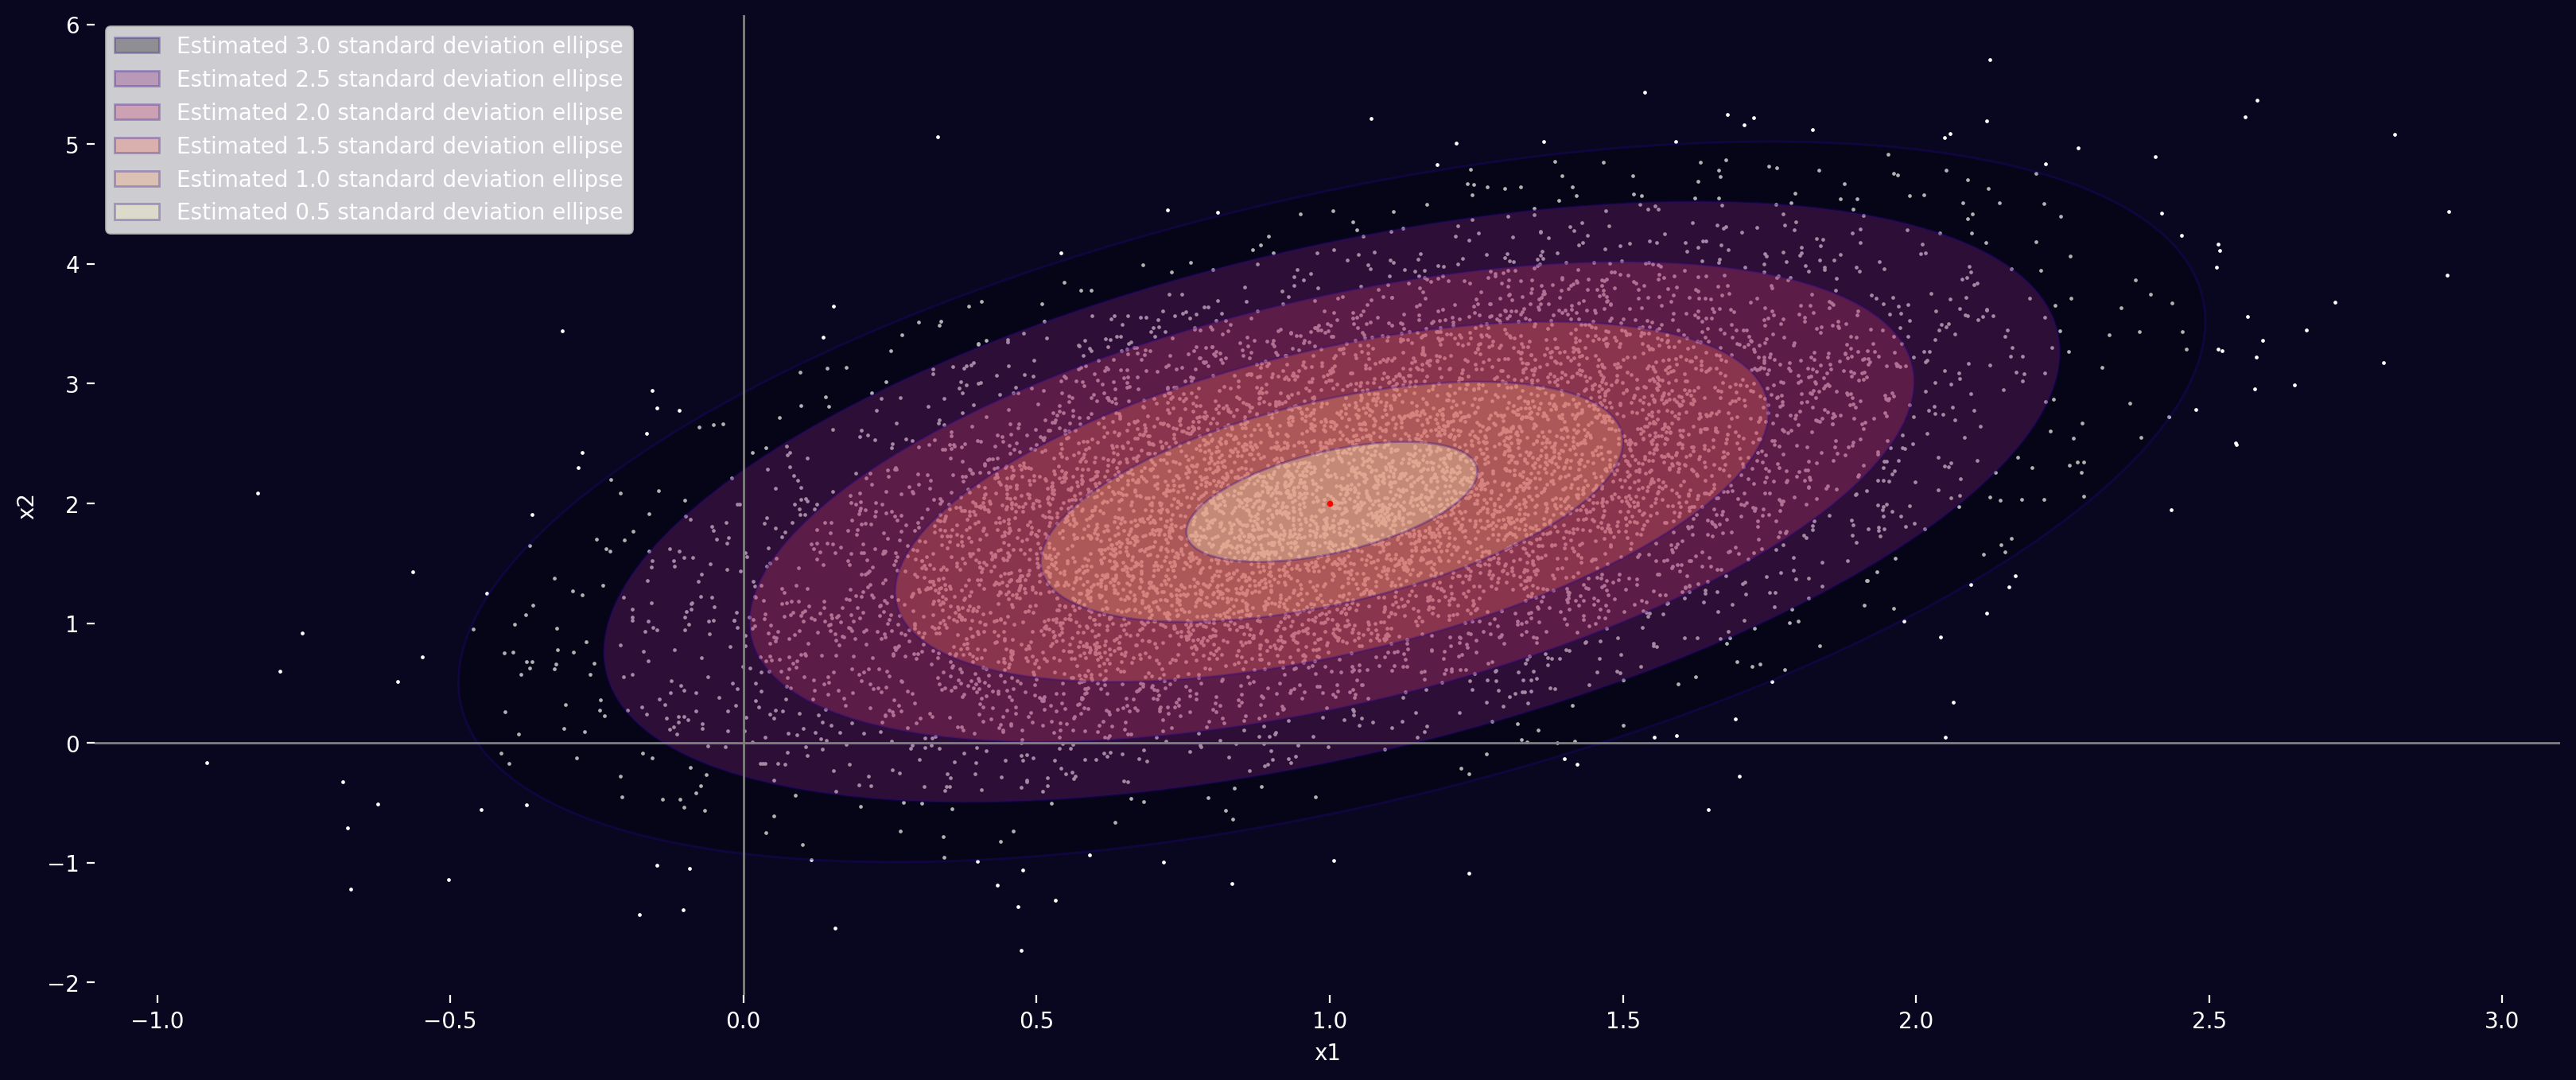

In [32]:
fig, ax = plt.subplots(dpi=200, figsize=(20,8))
magma = plt.get_cmap('magma')

ax.scatter(x, y, s=0.5, color='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[0])
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[100], n_std=2.5)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[140], n_std=2.0)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[180], n_std=1.5)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[210], n_std=1.0)
confidence_ellipse(x, y, ax, edgecolor=map.colors[10], alpha=0.3, facecolor=magma.colors[255], n_std=0.5)

ax.scatter(mu[0], mu[1], c='red', s=3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_facecolor(magma.colors[15])
fig.patch.set_facecolor(magma.colors[15])

COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
ax.spines['bottom'].set_color(COLOR)
ax.spines['top'].set_color(COLOR)
ax.xaxis.label.set_color(COLOR)
ax.tick_params(axis='x', colors=COLOR)